In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk("D:\\IU\\Projects\\Human Resource Descriptive ANalysis\\HRDataset_v14.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
!pip install pywaffle
from pywaffle import Waffle

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("D:\\IU\\Projects\\Human Resource Descriptive ANalysis\\HRDataset_v14.csv")
df.head().style.set_caption("District Dataframe").set_properties(**{'background-color': 'black',
                           'color': 'lawngreen','border': '1.5px  solid white'})

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,nan,N/A-StillEmployed,Active,Production,Michael Albert,22.000000,LinkedIn,Exceeds,4.600000,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000000,Indeed,Fully Meets,4.960000,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000000,LinkedIn,Fully Meets,3.020000,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,nan,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000000,Indeed,Fully Meets,4.840000,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000000,Google Search,Fully Meets,5.000000,4,0,2/1/2016,0,2


### Basic EDA:

In [7]:
df.shape

(311, 36)

In [8]:
df.info

<bound method DataFrame.info of                 Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfS

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


Note : Looks like ManagerID seems to have missing values.(Possible Reason:As you will see further down, there are some Employees with higher posts, who don't require Manager supervision.)

### Isolating numerical columns and categorical columns:

In [10]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

In [11]:
print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 18
The number of Numerical columns are: 18


In [12]:
ncol

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

In [13]:
for i in ncol:
    print(i,"-",df[i].nunique())
    

EmpID - 311
MarriedID - 2
MaritalStatusID - 5
GenderID - 2
EmpStatusID - 5
DeptID - 6
PerfScoreID - 4
FromDiversityJobFairID - 2
Salary - 308
Termd - 2
PositionID - 30
Zip - 158
ManagerID - 23
EngagementSurvey - 119
EmpSatisfaction - 5
SpecialProjectsCount - 9
DaysLateLast30 - 7
Absences - 20


In [14]:
ccol

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')

In [15]:
for i in ccol:
    print(i,"-",df[i].nunique())

Employee_Name - 311
Position - 32
State - 28
DOB - 307
Sex - 2
MaritalDesc - 5
CitizenDesc - 3
HispanicLatino - 4
RaceDesc - 6
DateofHire - 101
DateofTermination - 96
TermReason - 18
EmploymentStatus - 3
Department - 6
ManagerName - 21
RecruitmentSource - 9
PerformanceScore - 4
LastPerformanceReview_Date - 137


In [16]:
ncol

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')

### What are the visualisations I have tried/checked (Some of them are in the form of Hypothesis) :
1. Count of employees in each position. (Allows to check vacancies and stuff)
2. Count of employees in every state.
3. Female-Male Gender Ratio within the company.
4. Employee count under each manager.
5. Dept wise count of employees.
6. Age Distribution of employees.
7. Probability Distribution of Pay-Rate among various employees.
8. Pay Rate wrt Manager working under.
9. Performance Score Manager-wise to check which manager is leading a better team.
10. Date of termination having any connection with manager?
11. Employees leaving from a particular dept?
12. Employees joining the company per year.

### 1. Count of employees in each position. (Allows to check vacancies and stuff)

In [17]:
df["Position"]


0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: Position, Length: 311, dtype: object

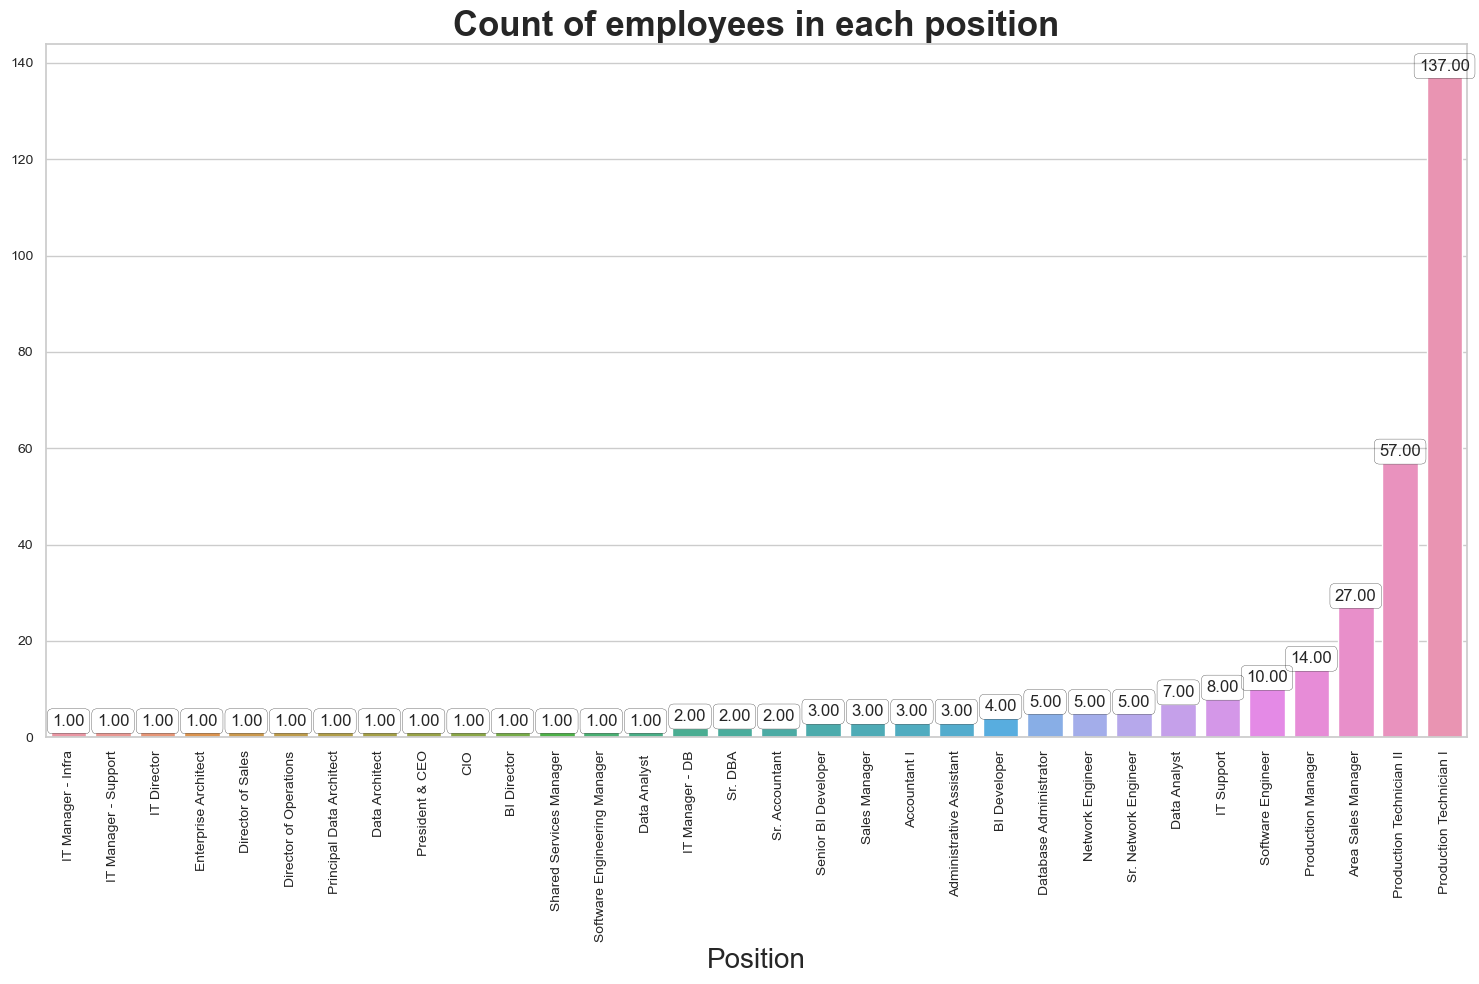

In [18]:
t=(df.groupby("Position")["EmpID"].count()).sort_values(ascending =True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t.index,y=t.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in each position",size=25,weight="bold") #Title of the plot
plt.xlabel("Position",fontsize=20) #Title of x-axis
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

Note : Looks like the company weighs more preference to "Production Technician" background while hiring employees.

### 2. Count of employees in every state.

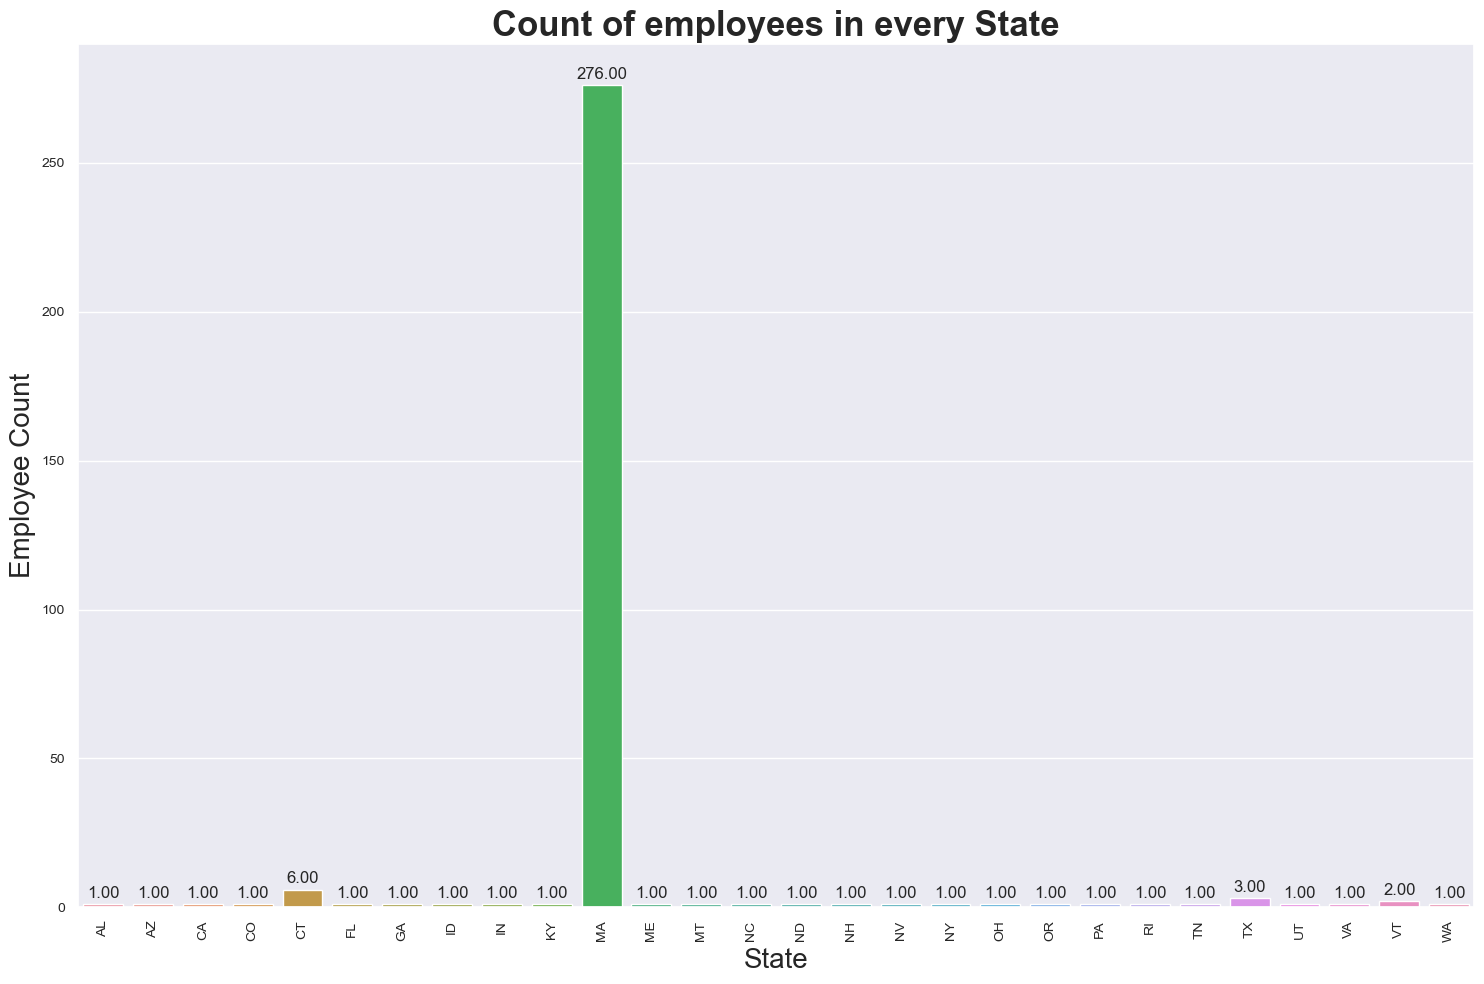

In [19]:
z=df.groupby("State")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=z.index,y=z.values)
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90) #Rotating the Label
plt.title("Count of employees in every State",size=25,weight="bold") #Title of the plot
plt.xlabel("State",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

Note : Looks like **MASSACHUSETTS** has a higher employee number. Might suggest that the company's based on this state.

In [20]:
y=df[["EmpID","Department","State"]].groupby(["State","Department"])["EmpID"].count()


In [21]:
table = pd.pivot_table(df, values='EmpID', index=['State', 'Department'],aggfunc=lambda x: len(x.unique()))
table.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
table

Count of Employees
State Department                              
AL    Sales                                  1
AZ    Sales                                  1
CA    Sales                                  1
CO    Sales                                  1
CT    IT/IS                                  5
      Sales                                  1
FL    Sales                                  1
GA    Sales                                  1
ID    Sales                                  1
IN    Sales                                  1
KY    Sales                                  1
MA    Admin Offices                          9
      Executive Office                       1
      IT/IS                                 44
      Production                           209
      Sales                                  2
      Software Engineering                  11
ME    Sales                                  1
MT    Sales                                  1
NC    Sales                                  1
ND    Sales                                  1
NH    Sales                                  1
NV    Sales                                  1
NY    Sales                                  1
OH    Sales                                  1
OR    Sales                                  1
PA    Sales                                  1
RI    Sales                                  1
TN    Sales                                  1
TX    IT/IS                                  1
      Sales                                  2
UT    Sales                                  1
VA    Sales                                  1
VT    Sales                                  2
WA    Sales                                  1

Note : As seen from the above table, the only state which handles Production is Massachusetts. Rest all other states don't have any production unit. So if you are hired as a Production Technician, you will be heading to Massachusetts for your work.

### Distribution within Massachusetts:

In [22]:
table.reset_index(drop=False,inplace=True)

In [23]:
t=table[table["State"]=="MA"].reset_index()
t.sort_values(by=["Count of Employees"],ascending=False,inplace=True)
t["Department"]=t["Department"].apply(lambda x:x.strip())

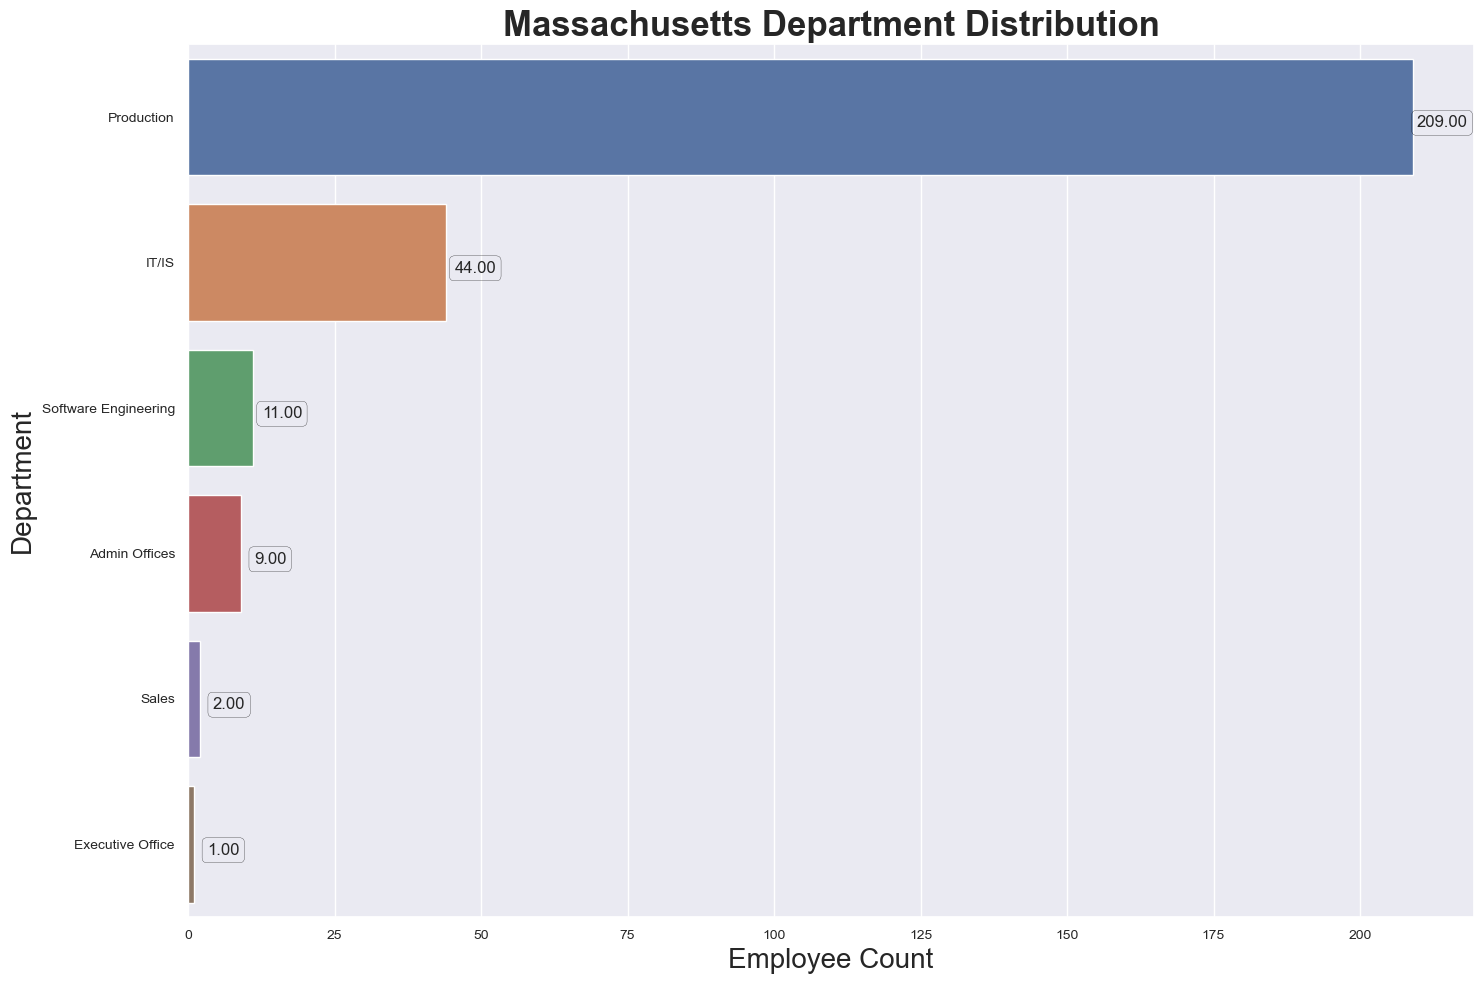

In [24]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plots=sns.barplot(x=t["Count of Employees"],y=t["Department"])
for p in plots.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

plt.yticks(rotation=0) #Rotating the Label
plt.title("Massachusetts Department Distribution",size=25,weight="bold") #Title of the plot
plt.xlabel("Employee Count",fontsize=20) #Title of x-axis
plt.ylabel("Department",fontsize=20)
plt.tick_params(labelsize=10) #Varying label size
plt.tight_layout()

### 3. Female-Male Gender Ratio within the company.

In [25]:
x=df.groupby("Sex")["EmpID"].count()/df["EmpID"].count()
x

Sex
F     0.565916
M     0.434084
Name: EmpID, dtype: float64

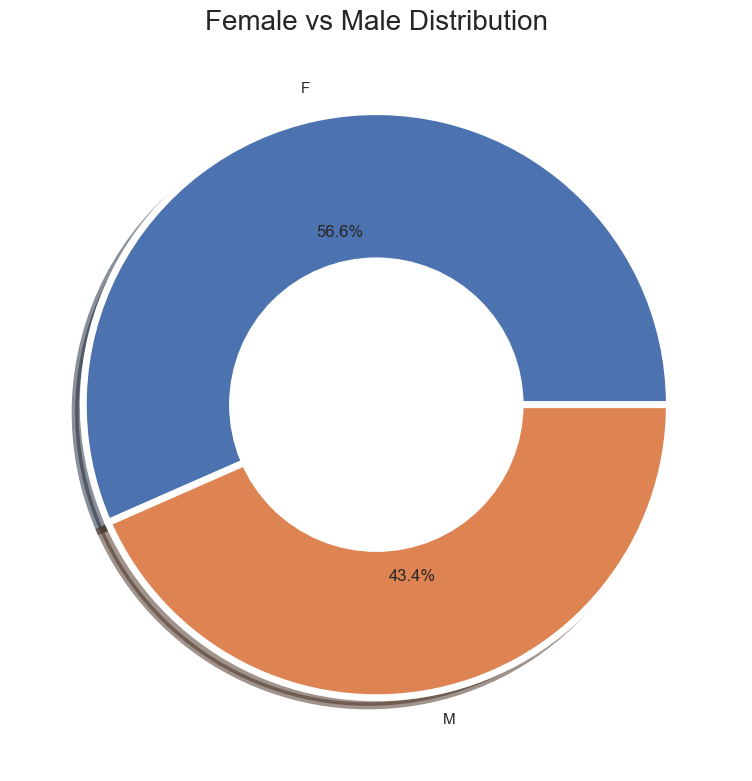

In [26]:
plt.figure(figsize=(8,8))
# Create a Donut Chart
plt.pie(x,labels=x.index,wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },autopct='%2.1f%%',shadow=True)
plt.rc("font",size=13)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Female vs Male Distribution",size=20,loc="center")

plt.tight_layout()

There are more Female employees than Males.(56.6% to 43.4%)

### 4. Employee count under each manager.

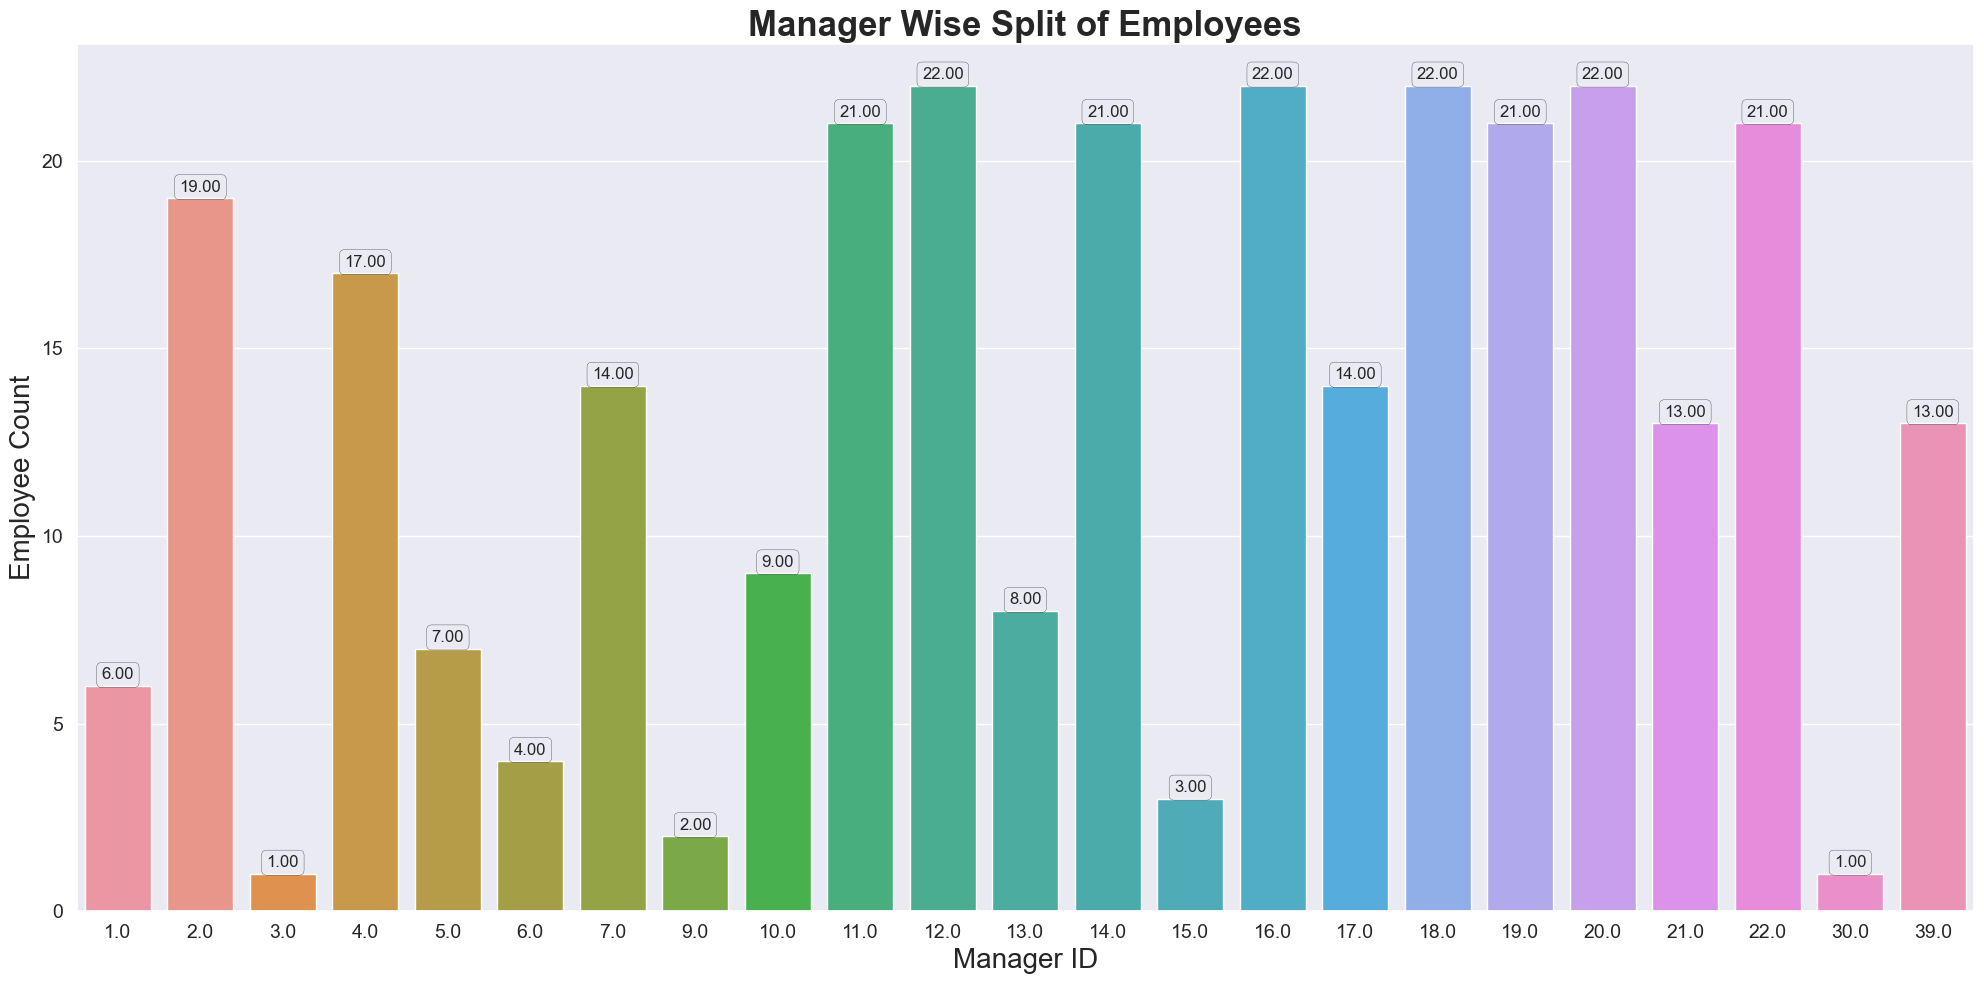

In [27]:
k=df.groupby("ManagerID")["EmpID"].count()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
plots=sns.barplot(x=k.index,y=k.values,estimator=sum)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
#plt.xticks(rotation=0) #Rotating the Label
plt.title("Manager Wise Split of Employees",size=25,weight="bold") #Title of the plot
plt.xlabel("Manager ID",fontsize=20) #Title of x-axis
plt.ylabel("Employee Count",fontsize=20)
plt.tick_params(labelsize=14) #Varying label size
plt.tight_layout()

Looks like Managers with IDs 3,9,15,30 have a less number of employees working under them.

### 5. Department wise count of employees.

In [28]:
j=df.groupby("Department")["EmpID"].count().reset_index(drop=False)


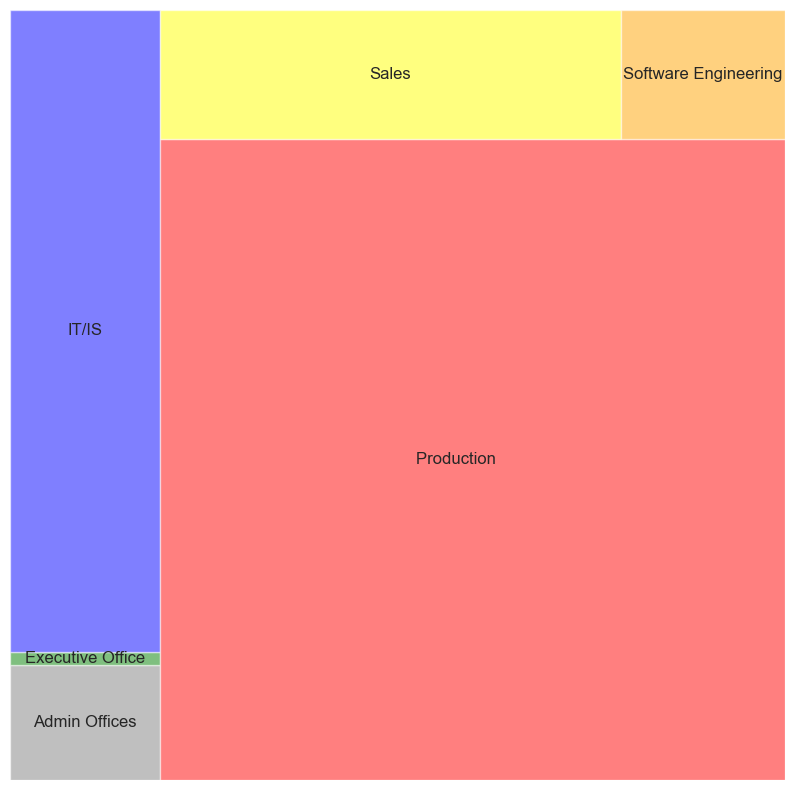

In [29]:
plt.figure(figsize=(10,10))
squarify.plot(sizes=j['EmpID'], label=j['Department'],color=["grey","green","blue", "red","yellow","orange","indigo"], alpha=.5)
plt.rc('font', size=8)          
plt.axis('off')
plt.show()

Majority of Employees belong to the Production Wing of the company.

### 6. Age Distribution of employees.

In [30]:
df["DOB"]


0      07/10/83
1      05/05/75
2      09/19/88
3      09/27/88
4      09/08/89
         ...   
306    05/11/85
307    05/04/82
308    08/30/79
309    02/24/79
310    08/17/78
Name: DOB, Length: 311, dtype: object

In [31]:
import datetime
from datetime import date,datetime
from dateutil.relativedelta import relativedelta

In [32]:
w=date.today()
w=w.strftime("%Y-%m-%d")

In [33]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs(relativedelta(d2, d1).years)

In [34]:
d=pd.to_datetime(df["DOB"]).apply(lambda x:x.strftime("%Y-%m-%d"))
df["Age"]=d.apply(lambda x:days_between(x, w))
df["Age"]

0      41
1      49
2      35
3      35
4      34
       ..
306    39
307    42
308    45
309    45
310    46
Name: Age, Length: 311, dtype: int64

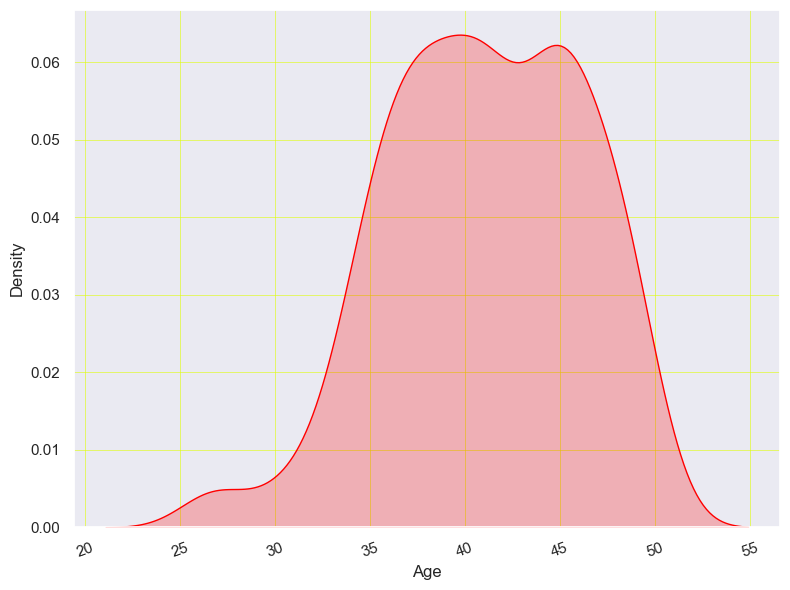

In [35]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.grid(True)
ax=sns.kdeplot(df["Age"],shade=True,color="red")
ax.grid(which='major', axis='x', zorder=0, color='#DFFF00', linewidth=0.4)
ax.grid(which='major', axis='y', zorder=0, color='#DFFF00', linewidth=0.4)
plt.rc('font', size=10,weight="bold")
plt.xticks(rotation=20)
plt.tight_layout()

Majority of the employees seems to be middle aged, with 35 being the mode(Higher probabilty of finding)

### 7. Probability Distribution of Pay-Rate among various employees.

#### (i) Salary distribution based on Gender

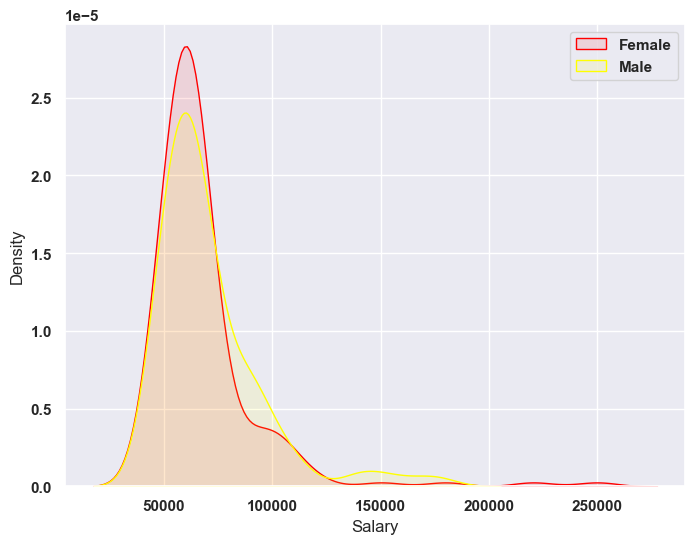

In [37]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.kdeplot(df.loc[(df["Sex"]=="F"),"Salary"],shade=True,color="red",label="Female",alpha=0.1)
sns.kdeplot(df.loc[(df["Sex"]=="M "),"Salary"],shade=True,color="yellow",label="Male",alpha=0.1) #shade=True
plt.legend()

<Axes: xlabel='Sex', ylabel='Salary'>

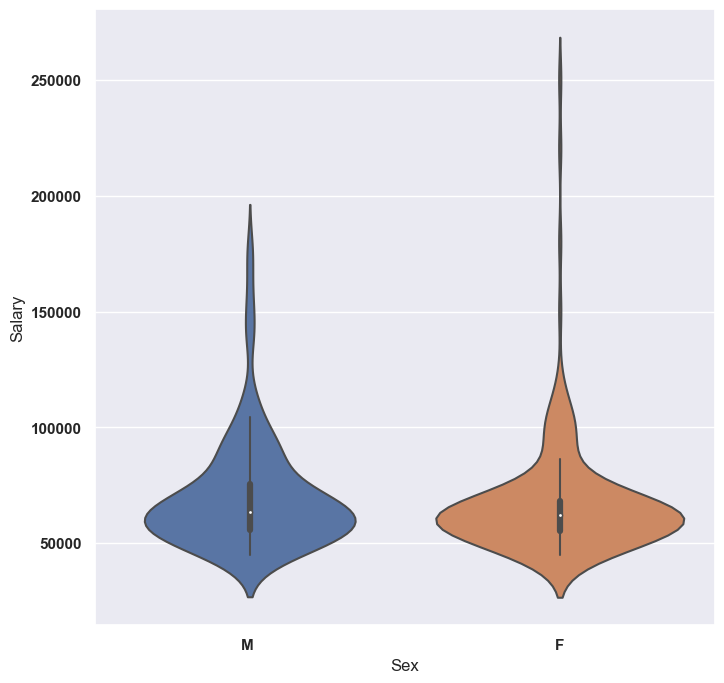

In [38]:
plt.figure(figsize=(8,8))
sns.violinplot(y=df["Salary"], x=df["Sex"])

In [41]:
df.loc[(df["Salary"]==df["Salary"].max()),:]


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
150,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10,30


Note: 
1. A women with the name Janet King is paid the highest salary in the company.
2. The plot shows that women are given high paid jobs as compared to men.

### 8. Pay Rate wrt Manager working under.

In [49]:
p=df[["EmpID","ManagerID","Salary"]].copy().dropna()
p.head()

,EmpID,ManagerID,Salary
0,10026,22.0,62506
1,10084,4.0,104437
2,10196,20.0,64955
3,10088,16.0,64991
4,10069,39.0,50825


In [50]:
#Need to check whether employees with high pay belong to a certain class of managers
p=(p.groupby("ManagerID").agg({"EmpID":"count","Salary":"mean"})).sort_values(by="Salary")
p.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
p

,Count of Employees,Salary
ManagerID,,
39.0,13,56549.615385
19.0,21,56936.666667
14.0,21,56938.571429
20.0,22,57183.818182
11.0,21,57881.857143
1.0,6,57893.833333
22.0,21,58099.142857
18.0,22,58912.181818
12.0,22,60095.454545


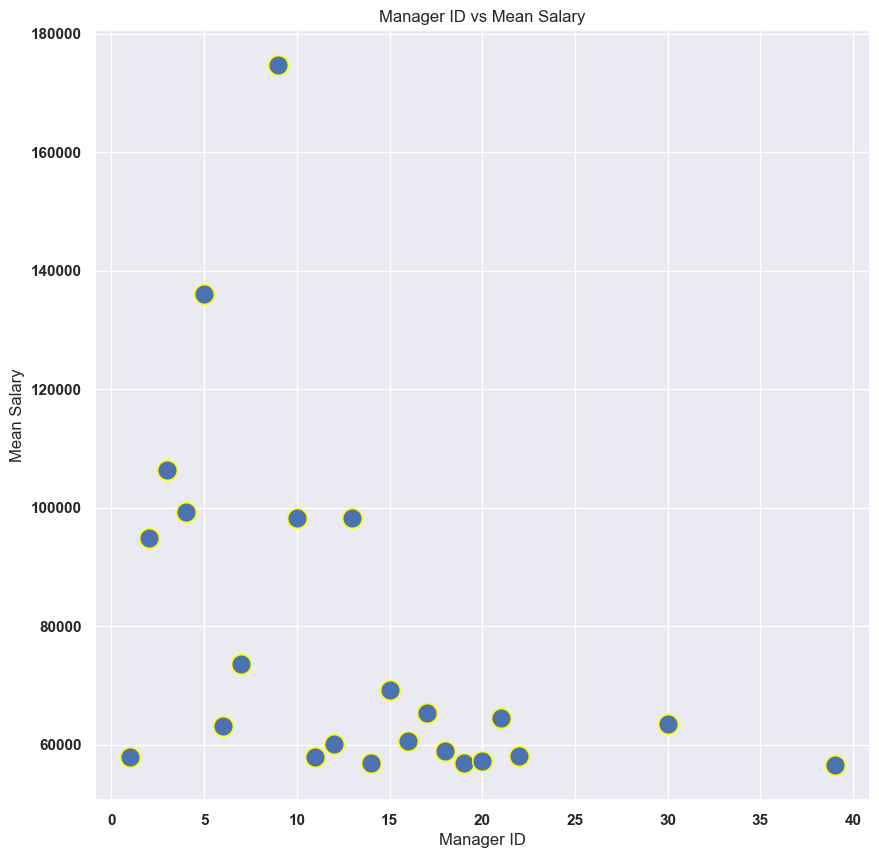

In [54]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")

# Use x and y as keyword arguments
sns.scatterplot(x=p.index, y=p.Salary, s=200, edgecolor="yellow")  # Corrected

# Add titles (main and on axis)
plt.xlabel("Manager ID")
plt.ylabel("Mean Salary")
plt.title("Manager ID vs Mean Salary")

# Show the graph
plt.show()


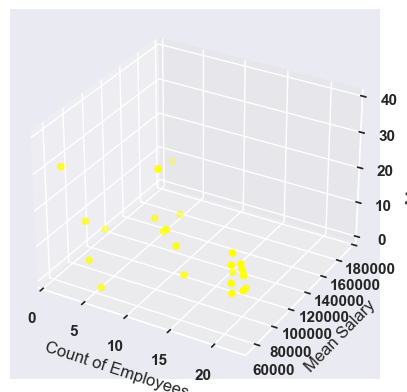

In [57]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = p['Count of Employees']
y = p['Salary']
z = p.index

ax.set_xlabel("Count of Employees")
ax.set_ylabel("Mean Salary")
ax.set_zlabel("Manager ID")

ax.scatter(x, y, z,c="yellow")

plt.show()

Note : Highest paid employee is working under Manager with ID=9

### 9. Performance Score Manager-wise to check which manager is leading a better team.

**a).** Manager-Wise Split:

In [59]:
df["PerformanceScore"] # PIP means Performance Improvement Plans-----meaning they are poorly performing.

0          Exceeds
1      Fully Meets
2      Fully Meets
3      Fully Meets
4      Fully Meets
          ...     
306    Fully Meets
307            PIP
308        Exceeds
309    Fully Meets
310    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [60]:
df["PerformanceScore"].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

A performance improvement plan is also referred to as a PIP and an alternative name is a performance action plan. PIP is an HR leverage tool that outlines specific steps for the employee to take to improve and goals for them to work towards.

I have assumed that the highest rating is 4 and the lowest rating is 1.

'Exceeds'------------------4

'Fully Meets'--------------3

'Needs Improvement'--------2

'PIP'----------------------1(Very Poor)

In [63]:
dic=dict(zip(df["PerformanceScore"].unique(),[4,3,2,1]))
df["PS"]=df["PerformanceScore"].apply(lambda x:dic[x])

In [64]:
c=df[["EmpID","ManagerID","PS"]].copy()
c.dropna(inplace=True)
c.head()

,EmpID,ManagerID,PS
0,10026,22.0,4
1,10084,4.0,3
2,10196,20.0,3
3,10088,16.0,3
4,10069,39.0,3


In [65]:
d=c.groupby(["ManagerID","PS"])["EmpID"].count()
d=pd.DataFrame(d)
d #Gives an account of the count of employees having certain performance scores under various managers. 

EmpID
ManagerID PS       
1.0       3       6
2.0       2       2
          3      13
          4       4
3.0       3       1
4.0       3      15
          4       2
5.0       2       1
          3       4
          4       2
6.0       3       3
          4       1
7.0       1       1
          3      13
9.0       3       2
10.0      2       1
          3       6
          4       2
11.0      1       2
          2       1
          3      15
          4       3
12.0      1       4
          2       1
          3      10
          4       7
13.0      3       8
14.0      2       1
          3      19
          4       1
15.0      2       1
          3       2
16.0      2       2
          3      18
          4       2
17.0      1       2
          3      12
18.0      2       1
          3      18
          4       3
19.0      2       1
          3      18
          4       2
20.0      1       1
          2       1
          3      18
          4       2
21.0      1       2
          3       9
          4       2
22.0      1       1
          2       3
          3      15
          4       2
30.0      3       1
39.0      2       2
          3      10
          4       1

In [66]:
ori=d.reset_index()
good=ori[ori["PS"]>=3]
bad=ori[ori["PS"]<3]

good.shape,bad.shape

((38, 3), (20, 3))

In [67]:
g=pd.DataFrame(good.groupby("ManagerID")["EmpID"].sum()).reset_index()
b=pd.DataFrame(bad.groupby("ManagerID")["EmpID"].sum()).reset_index()

g=g.rename(columns={"EmpID":"Count of Employees"})
b=b.rename(columns={"EmpID":"Count of Employees"})

In [68]:
b

,ManagerID,Count of Employees
0,2.0,2
1,5.0,1
2,7.0,1
3,10.0,1
4,11.0,3
5,12.0,5
6,14.0,1
7,15.0,1
8,16.0,2
9,17.0,2


Text(0.5, 1.0, 'Count of UNDER-Performing Employees Manager-Wise')

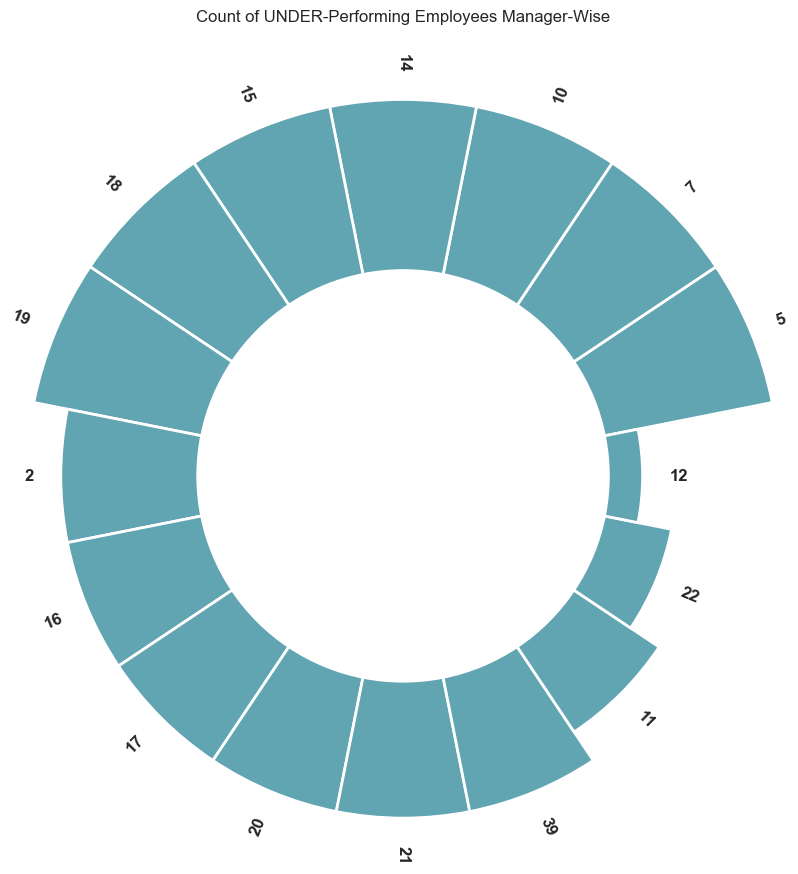

In [69]:
# Reorder the dataframe
b = b.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = b['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * b["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(b.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(b.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, b["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of UNDER-Performing Employees Manager-Wise",pad=50)

Text(0.5, 1.0, 'Count of OVER-Performing Employees Manager-Wise')

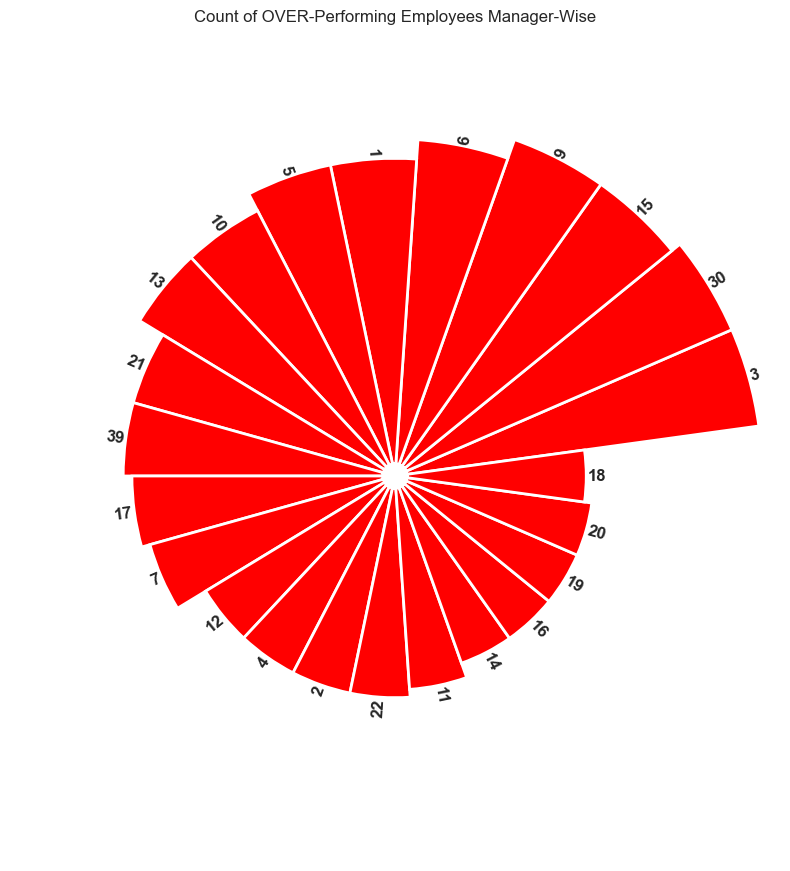

In [70]:
# Reorder the dataframe
g = g.sort_values(by=["Count of Employees"])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = g['Count of Employees'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * g["Count of Employees"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(g.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(g.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=np.power(heights,2), 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#ff0000",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, np.power(heights,2), g["ManagerID"].astype("int")):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

ax.set_title("Count of OVER-Performing Employees Manager-Wise",pad=50)


**Conclusion:**
Manager with ID=18 has the best lot of employees, because there are less employees underperforming and more employees overperforming.

**b.** Gender Wise Split:

In [71]:
h=pd.DataFrame(df.groupby(["Sex","PS"])["EmpID"].count()).reset_index()
h

,Sex,PS,EmpID
0,F,1,5
1,F,2,9
2,F,3,142
3,F,4,20
4,M,1,8
5,M,2,9
6,M,3,101
7,M,4,17


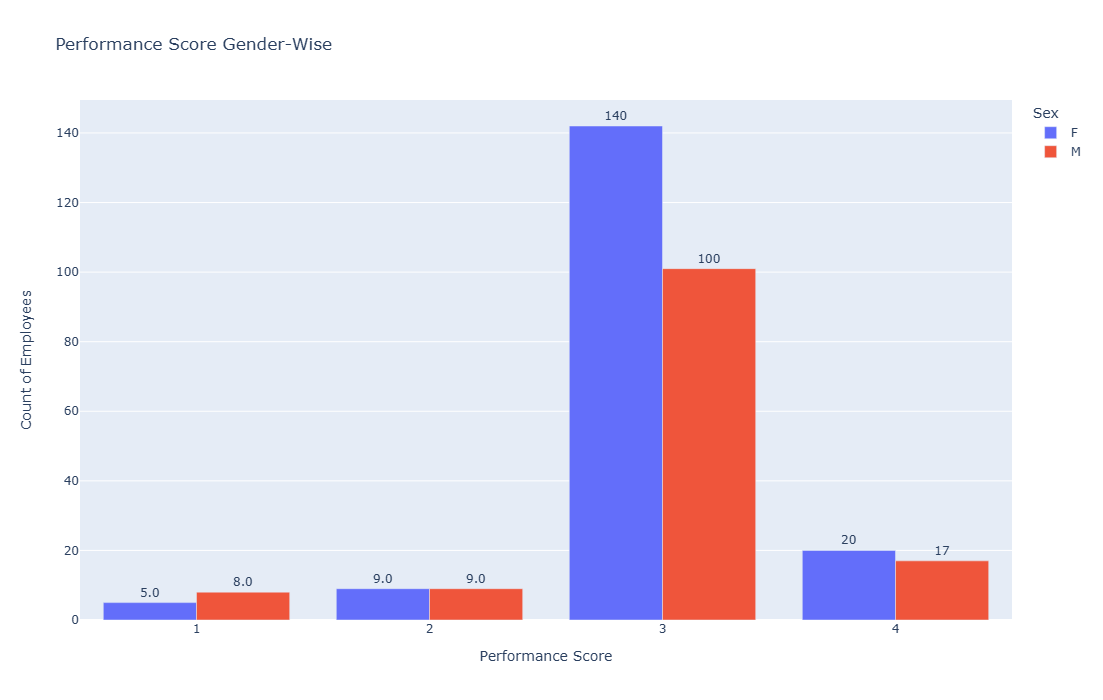

In [88]:
fig = px.bar(h, x='PS', y='EmpID', color='Sex', title='Performance Score Gender-Wise', text="EmpID",
             labels={'PS': 'Performance Score', 'EmpID': 'Count of Employees'},
             barmode="group")

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=2, height=700)  # Increase the height of the chart

fig.show()


Note : Again has been proven that Women are more efficient compared to Men.

### 10. Date of termination having any connection with manager?

In [89]:
df["DateofHire"]

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [90]:
df["DateofTermination"]

0            NaN
1      6/16/2016
2      9/24/2012
3            NaN
4       9/6/2016
         ...    
306          NaN
307    9/29/2015
308          NaN
309          NaN
310          NaN
Name: DateofTermination, Length: 311, dtype: object

In [91]:
df["TermReason"]

0      N/A-StillEmployed
1          career change
2                  hours
3      N/A-StillEmployed
4       return to school
             ...        
306    N/A-StillEmployed
307     Another position
308    N/A-StillEmployed
309    N/A-StillEmployed
310    N/A-StillEmployed
Name: TermReason, Length: 311, dtype: object

In [92]:
v=df[["EmpID","DateofHire","DateofTermination","TermReason"]].copy()
v.dropna(inplace=True) #Removing those employees who are still working in the company
v.head()

,EmpID,DateofHire,DateofTermination,TermReason
1,10084,3/30/2015,6/16/2016,career change
2,10196,7/5/2011,9/24/2012,hours
4,10069,7/11/2011,9/6/2016,return to school
10,10252,1/10/2011,1/12/2017,Another position
11,10242,4/2/2012,9/19/2016,unhappy


In [93]:
v.shape  #Looks like 311-104=207 employees have been retained by the company

(104, 4)

In [94]:
v.TermReason.nunique(),v.TermReason.unique() #One of the employees' was a Gangster lol.

(17,
 array(['career change', 'hours', 'return to school', 'Another position',
        'unhappy', 'attendance', 'performance',
        'Learned that he is a gangster', 'retiring',
        'relocation out of area', 'more money', 'military',
        'no-call, no-show', 'Fatal attraction',
        'maternity leave - did not return', 'medical issues',
        'gross misconduct'], dtype=object))

In [95]:
v1=pd.DataFrame(v.groupby("TermReason")["EmpID"].count()).reset_index()
v1

,TermReason,EmpID
0,Another position,20
1,Fatal attraction,1
2,Learned that he is a gangster,1
3,attendance,7
4,career change,9
5,gross misconduct,1
6,hours,8
7,maternity leave - did not return,3
8,medical issues,3
9,military,4


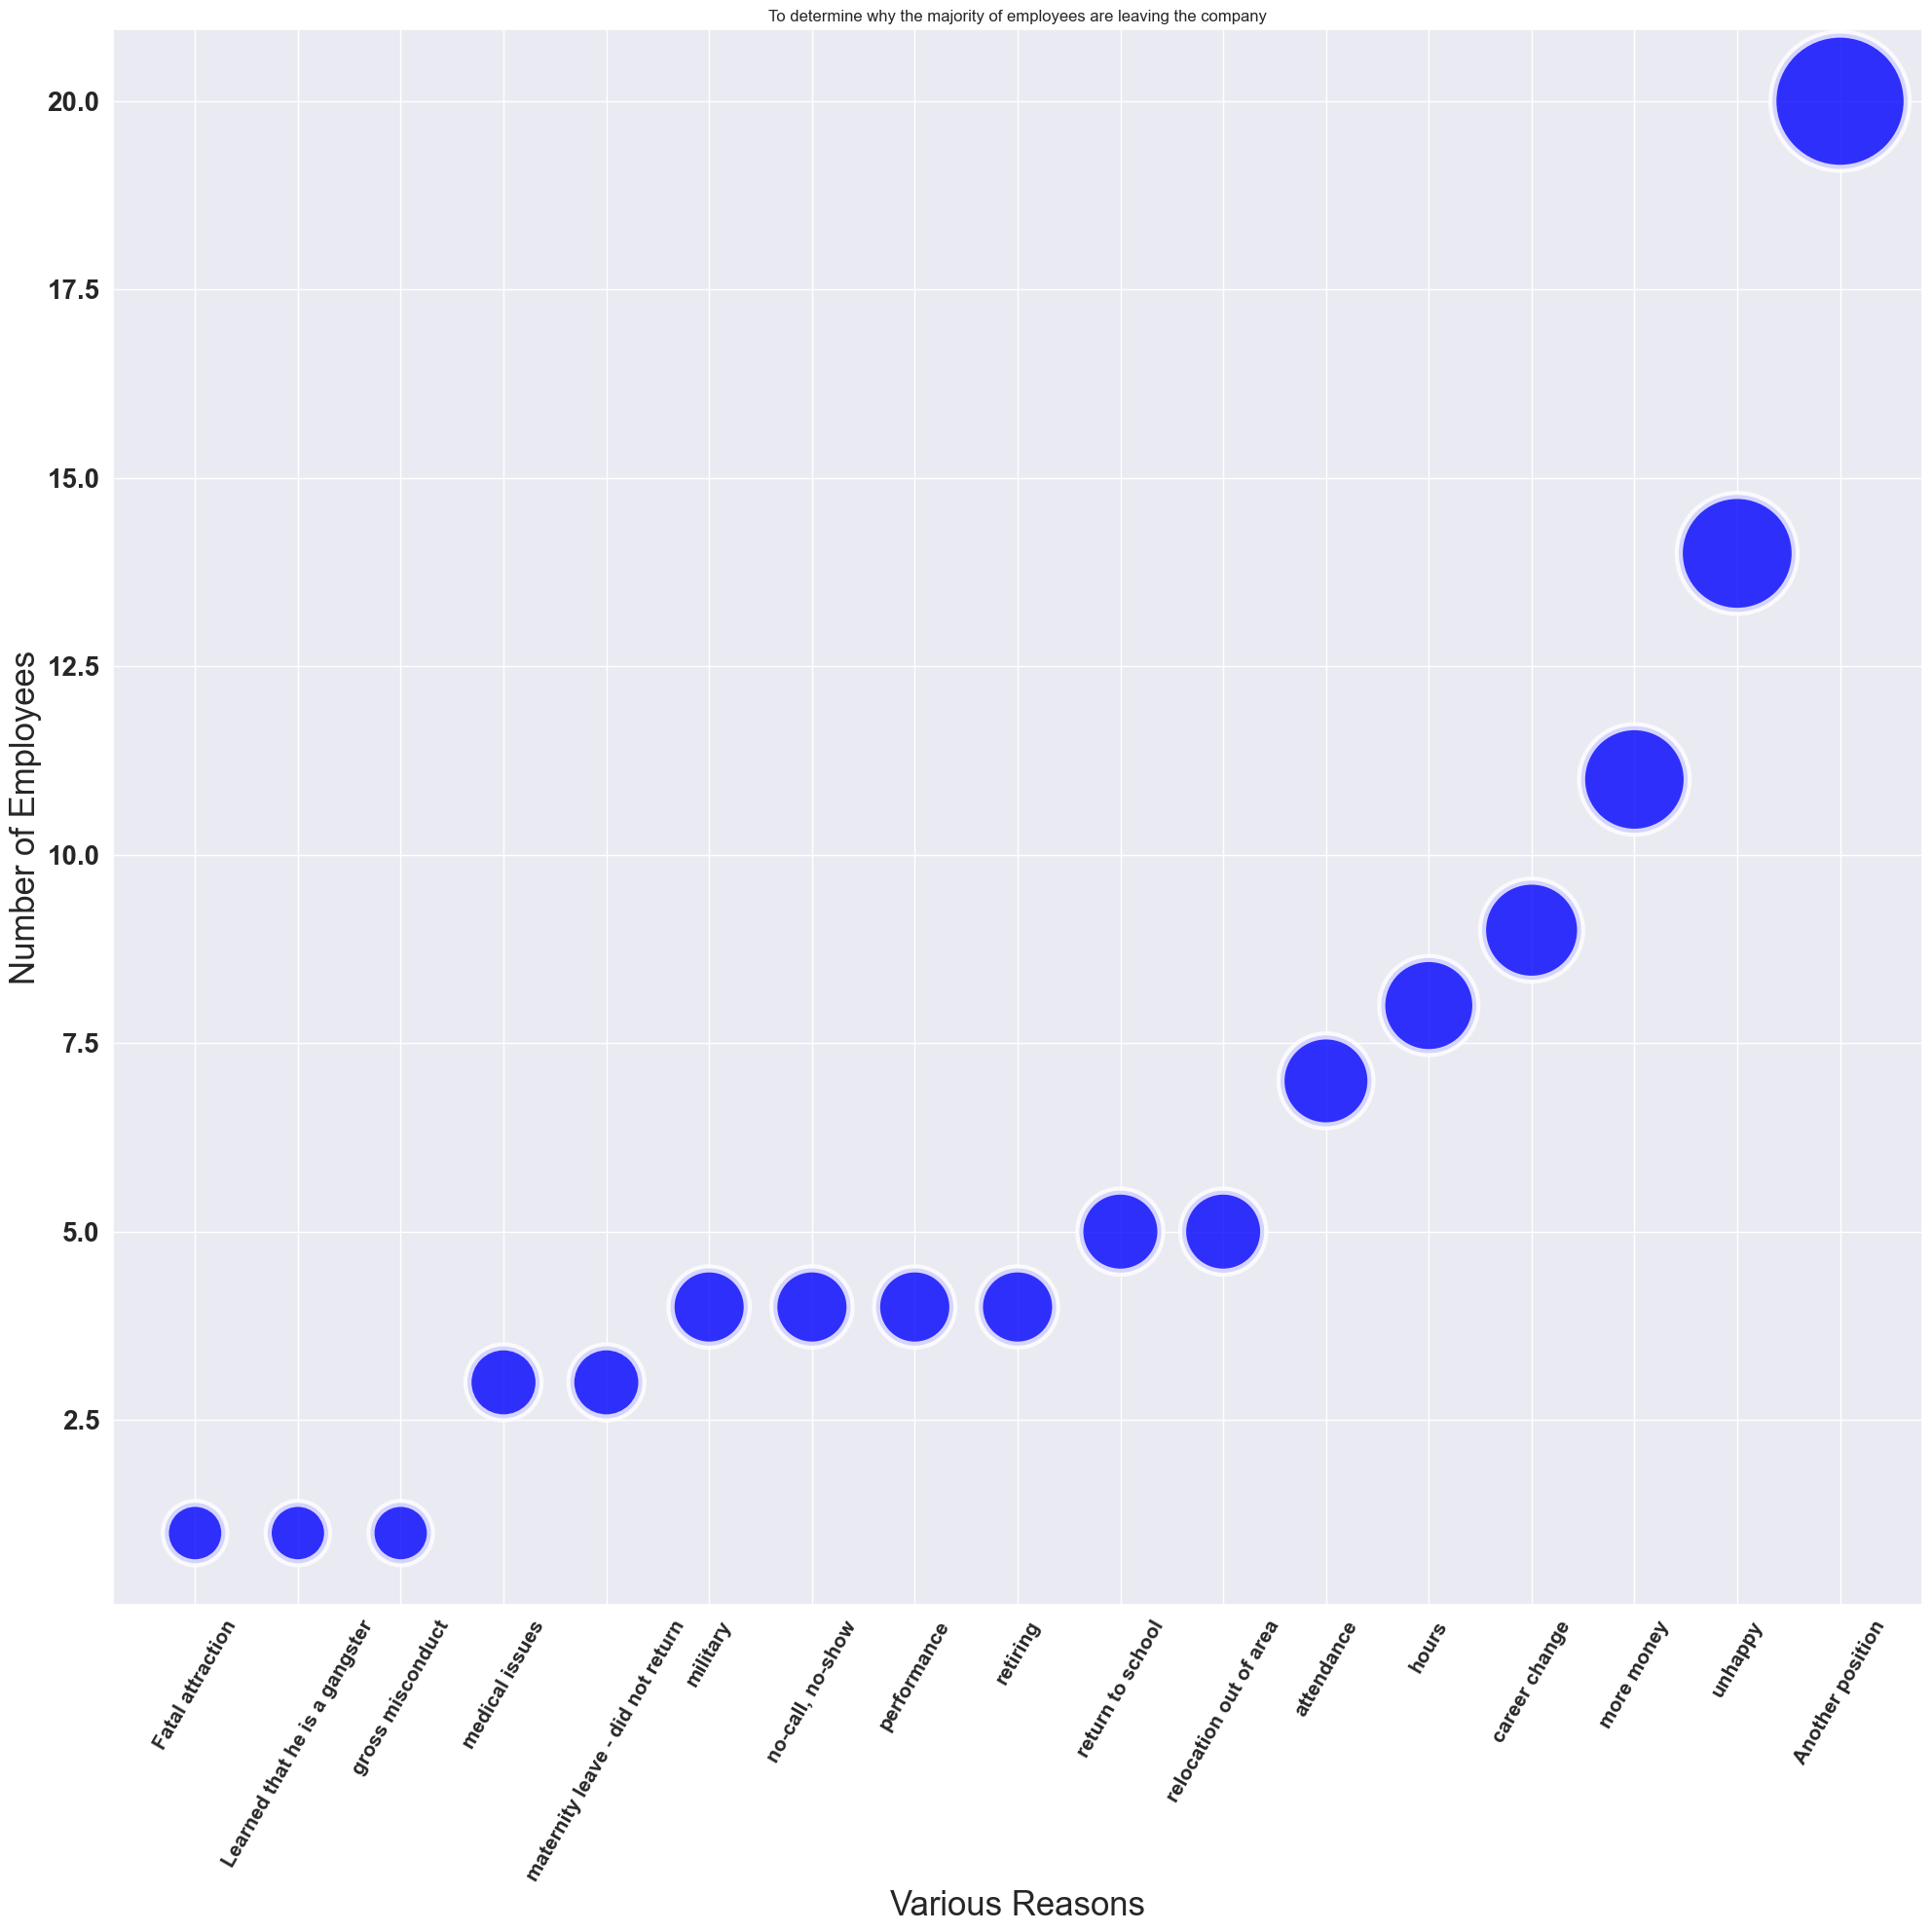

In [96]:
plt.figure(figsize=(20,20))
sns.set_theme()
sns.scatterplot(data=v1.sort_values(by=["EmpID"]), x="TermReason", y="EmpID", size="EmpID",color="blue", legend=False, sizes=(2000, 10000), alpha=0.8, linewidth=6)
plt.xlabel("Various Reasons",size=25)
plt.ylabel("Number of Employees",size=25)
plt.title("To determine why the majority of employees are leaving the company", loc="center")
plt.yticks(fontsize=20) 
plt.xticks(fontsize=15,rotation=60) 
# show the graph
plt.tight_layout()

The top three reasons for the Employees to leave the company were:
                     
- A better position in another company leading to career upgrowth.(~20%)

- Lack of Job Satisfaction(unhappiness)

- A better salary offered by rival companies.

### 11. Employees leaving from a particular dept?

In [99]:
w=df[["EmpID","DateofHire","DateofTermination","Department"]].copy()
w.dropna(inplace=True) #Removing those employees who are still working in the company
w.head()

,EmpID,DateofHire,DateofTermination,Department
1,10084,3/30/2015,6/16/2016,IT/IS
2,10196,7/5/2011,9/24/2012,Production
4,10069,7/11/2011,9/6/2016,Production
10,10252,1/10/2011,1/12/2017,Production
11,10242,4/2/2012,9/19/2016,Production


In [100]:
w1=pd.DataFrame(w.groupby("Department")["EmpID"].count()).reset_index()
w1

,Department,EmpID
0,Admin Offices,2
1,IT/IS,10
2,Production,83
3,Sales,5
4,Software Engineering,4


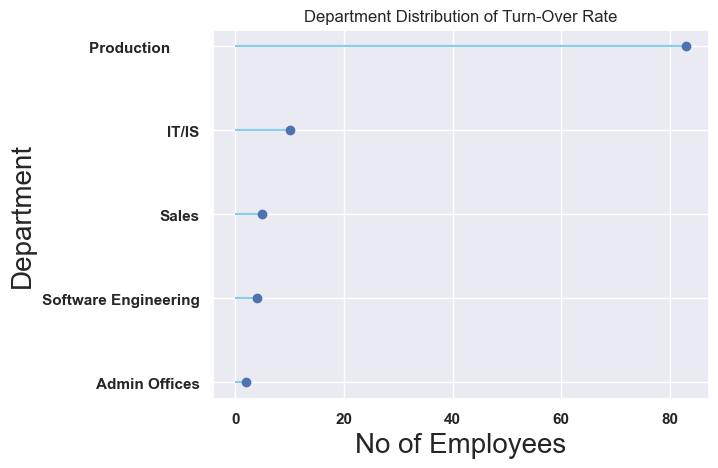

In [101]:
# Reorder it based on the values
ordered_df = w1.sort_values(by='EmpID')
my_range=range(1,len(w1.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['EmpID'], color='skyblue')
plt.plot(ordered_df['EmpID'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Department'])
plt.title("Department Distribution of Turn-Over Rate", loc='center')
plt.xlabel('No of Employees',size=20)
plt.ylabel('Department',size=20)

# Show the plot
plt.show()

Looks Like the Production Dept has lost a chunk of employees ever since the beginning.

### 12. Employees joining the company per year.

In [102]:
n=df[["EmpID","DateofHire","Sex"]].copy()
n["DateofHire"]=pd.to_datetime(n["DateofHire"])
n["Group"]=n["DateofHire"].apply(lambda x:int(x.year))

In [103]:
n=pd.DataFrame(n.groupby("Group")["EmpID"].count())
n

,EmpID
Group,
2006,1
2007,2
2008,3
2009,7
2010,9
2011,83
2012,45
2013,44
2014,60


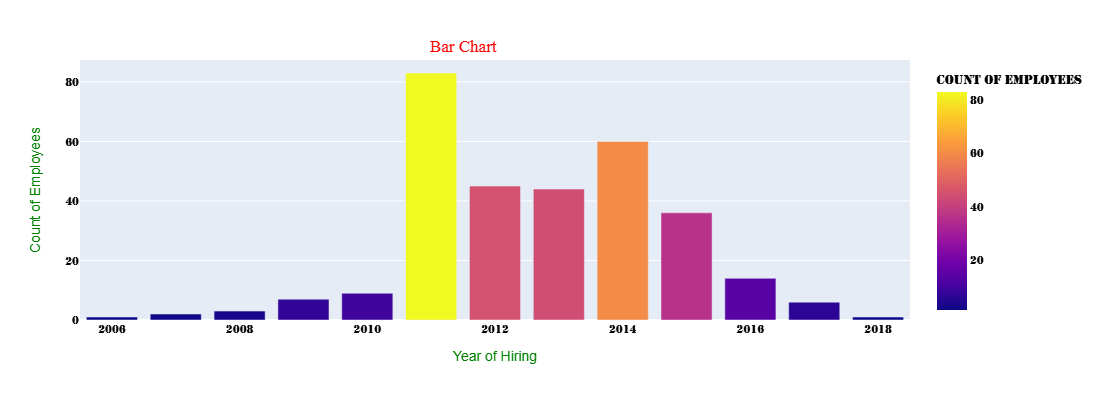

In [104]:
fig = px.bar(n, x=n.index, y='EmpID',color='EmpID',
             labels={'EmpID':'Count of Employees',"Group":"Year of Hiring"}, height=400)
fig.update_layout(
    font_family="Stencil",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_yaxes(title_font_family="Arial",
                 title_font_color="Green")
fig.update_layout(
    title={
        'text': "Bar Chart",
        'y':0.9,
        'x':0.42,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Note : The year 2011 was the Golden Year, with most of the recruitment taking place.(83 Employees employed)

In [105]:
n=n.reset_index()

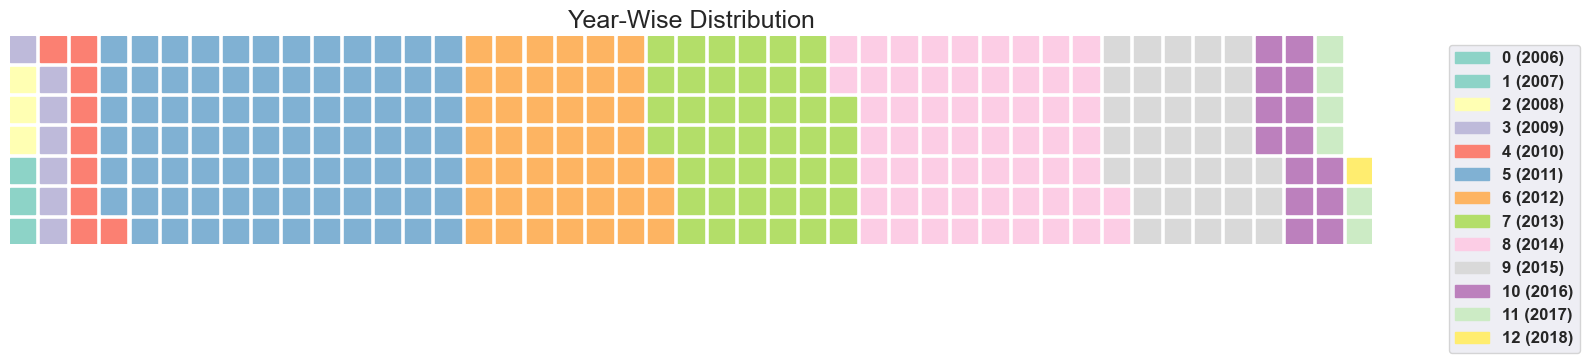

In [108]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Assuming 'n' and 'n_categories' are defined, along with necessary imports

n_categories = n.shape[0]

# Define colors using Set3 colormap
colors = [plt.cm.Set3(i / float(n_categories)) for i in range(n_categories)]

# Create the Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,  # Number of rows for the waffle chart
    values=n["EmpID"],  # Values for the chart
    labels=["{0} ({1})".format(df[0], df[1]) for df in n[['Group', 'EmpID']].itertuples()],  # Label format
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},  # Legend settings
    colors=colors,  # Color palette
    figsize=(16, 9),  # Figure size
    title={'label': 'Year-Wise Distribution', 'loc': 'center', 'fontsize': 18}  # Title settings
)

plt.show()


Through this Waffle visual, I have tried to show that year 2011 has the most number of recruitments.

#### Looking for some correlations among the numerical columns:

In [113]:
# Drop columns that contain 'ID' in their name
df_numeric = df.drop([i for i in ncol if "ID" in i], axis=1)

# Select only numeric columns
df_numeric = df_numeric.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_m = df_numeric.corr()

# Display the correlation matrix
print(corr_m)


                        Salary     Termd       Zip  EngagementSurvey  \
Salary                1.000000 -0.093994 -0.037242          0.064966   
Termd                -0.093994  1.000000 -0.139006         -0.017543   
Zip                  -0.037242 -0.139006  1.000000         -0.132848   
EngagementSurvey      0.064966 -0.017543 -0.132848          1.000000   
EmpSatisfaction       0.062718 -0.004732 -0.064571          0.187105   
SpecialProjectsCount  0.508333 -0.147429 -0.097027          0.013227   
DaysLateLast30       -0.069443  0.136379  0.016150         -0.585232   
Absences              0.082382  0.098274  0.078779         -0.008771   
Age                  -0.030583 -0.006640 -0.115803          0.015629   
PS                    0.125138 -0.112317 -0.058475          0.576924   

                      EmpSatisfaction  SpecialProjectsCount  DaysLateLast30  \
Salary                       0.062718              0.508333       -0.069443   
Termd                       -0.004732            

<Axes: >

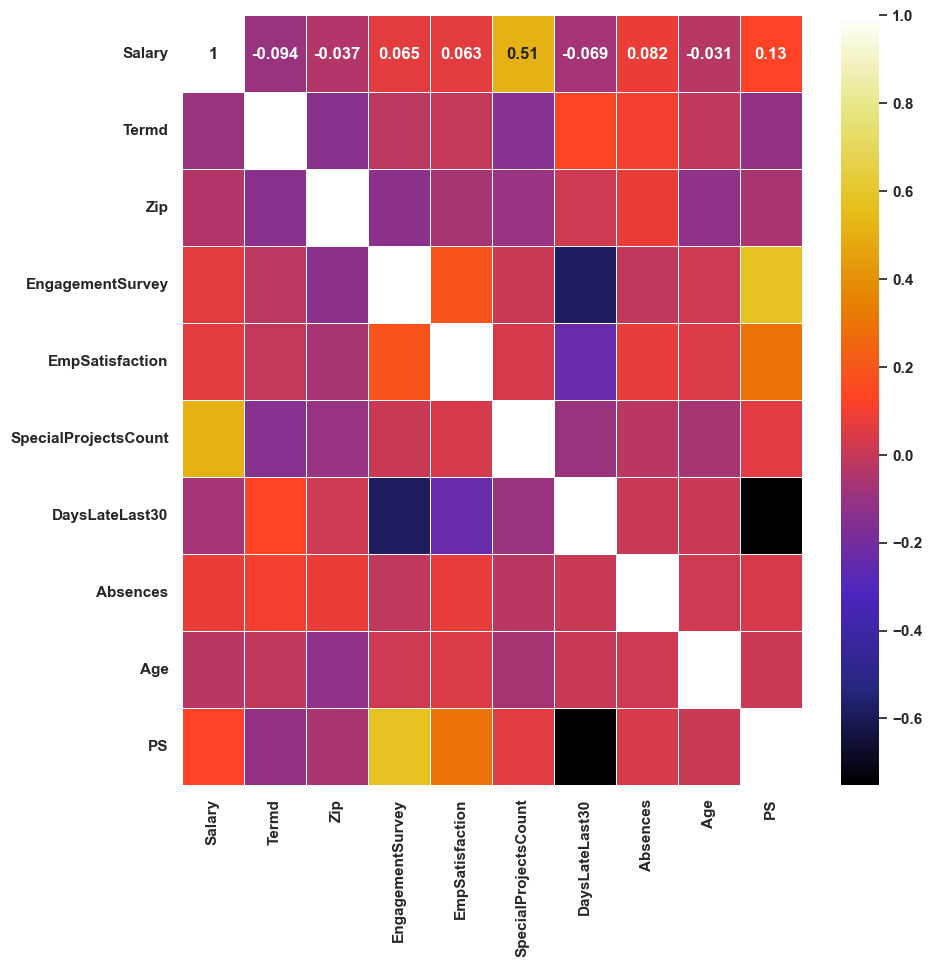

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_m,annot=True,linewidths=.5,cmap="CMRmap")

Note : Looks like there is only one Significant correlation which we can check, i.e. the one between Salary and SpecialProjectsCount.

Text(0, 0.5, 'Salary')

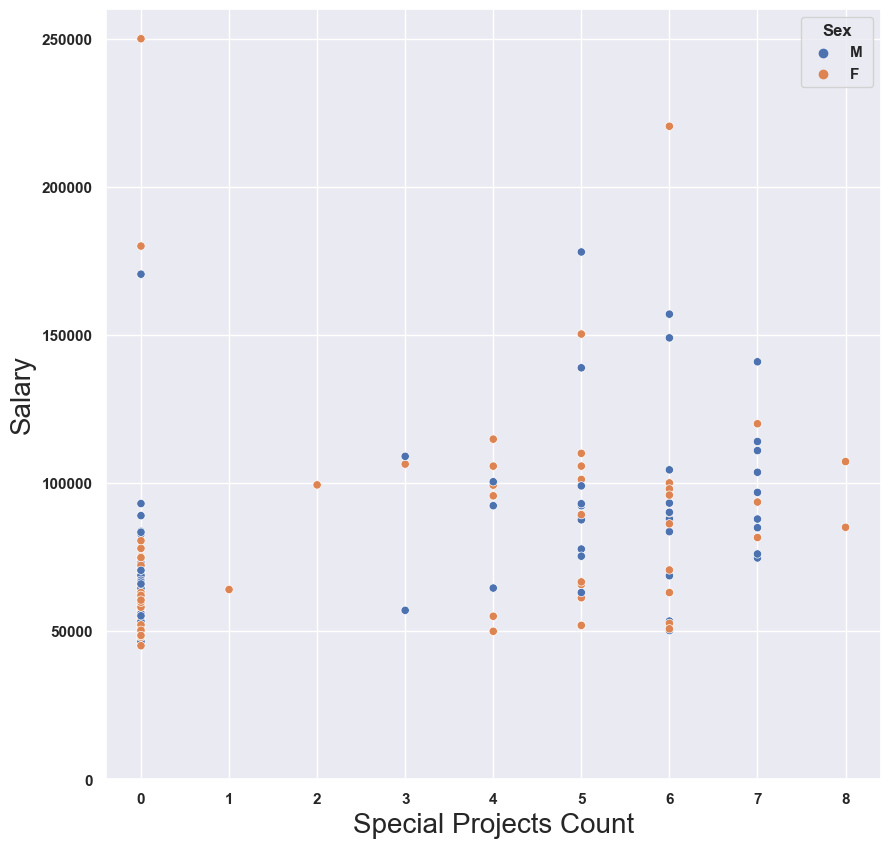

In [115]:
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
sns.scatterplot(x=df["SpecialProjectsCount"],y=df["Salary"],hue=df["Sex"])
plt.ylim([0,2.6e5])
plt.xlabel("Special Projects Count",size=20)
plt.ylabel("Salary",size=20)